# Introduction
 * Predict confirmed cases for United States using linear regression. First find the number of new cases daily and perform linear regression to predict the number of new cases and the total number of cases in the next 60 days. 

#references
#linear regression
https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_csv("covid_19_data.csv")
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4242,4243,03/08/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4243,4244,03/08/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4244,4245,03/08/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4245,4246,03/08/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [4]:
usa = df.loc[df['Country/Region'] == 'US']
usa.max()

SNo                               4247
ObservationDate             03/08/2020
Province/State         Yolo County, CA
Country/Region                      US
Last Update        2020-03-08T21:53:04
Confirmed                           83
Deaths                              17
Recovered                            2
dtype: object

In [5]:
usa

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32,01/22/2020,Washington,US,1/22/2020 17:00,1.0,0.0,0.0
69,70,01/23/2020,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118,01/24/2020,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119,01/24/2020,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159,01/25/2020,Washington,US,1/25/20 17:00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4238,4239,03/08/2020,"Yolo County, CA",US,2020-03-06T20:13:14,1.0,0.0,0.0
4243,4244,03/08/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4244,4245,03/08/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4245,4246,03/08/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [6]:
usa.min()

SNo                                 32
ObservationDate             01/22/2020
Province/State      Norfolk County, MA
Country/Region                      US
Last Update            1/22/2020 17:00
Confirmed                            0
Deaths                               0
Recovered                            0
dtype: object

In [7]:
confirmed_us = usa.groupby('ObservationDate')['Confirmed'].sum().reset_index()

In [8]:
confirmed_us = confirmed_us.set_index('ObservationDate')
confirmed_us.index

Index(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020',
       '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020',
       '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020',
       '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020',
       '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/15/2020',
       '02/16/2020', '02/17/2020', '02/18/2020', '02/19/2020', '02/20/2020',
       '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020', '02/25/2020',
       '02/26/2020', '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020',
       '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020',
       '03/07/2020', '03/08/2020'],
      dtype='object', name='ObservationDate')

In [9]:
confirmed_us

,Confirmed
ObservationDate,
01/22/2020,1.0
01/23/2020,1.0
01/24/2020,2.0
01/25/2020,2.0
01/26/2020,5.0
01/27/2020,5.0
01/28/2020,5.0
01/29/2020,5.0
01/30/2020,5.0


In [38]:
size = len(confirmed_us)
us_change = [confirmed_us['Confirmed'][i]-confirmed_us['Confirmed'][i-1] for i in range(1,size)]

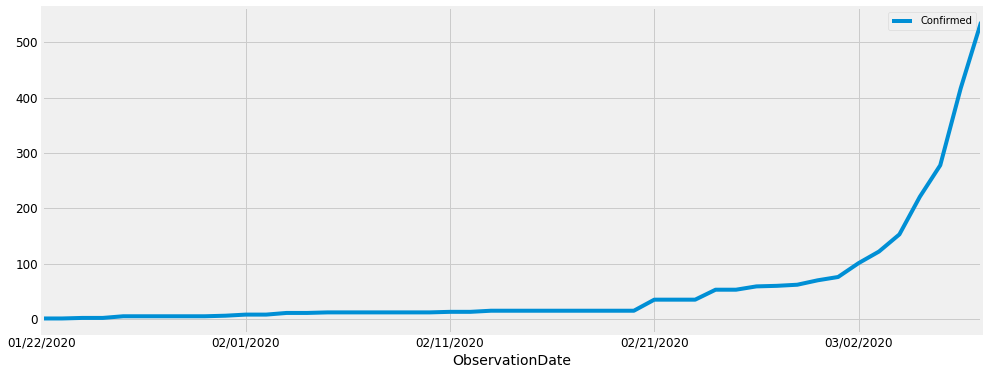

In [10]:
confirmed_us.plot(figsize=(15, 6))
plt.show()

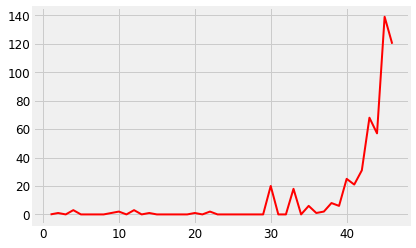

In [42]:
days=[x+1 for x in range(size-1)]
plt.plot(days, us_change, color='red', linewidth=2)
plt.show()

# linear regression

In [75]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [43]:
X = np.asarray([x for x in range(len(us_change))]).reshape(-1,1)
y = np.asarray(us_change).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-16.43194079]
[[1.3202307]]


In [92]:
y_pred = regressor.predict(X_test)


In [93]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.0,16.573827
1,0.0,12.613135
2,0.0,20.534519
3,0.0,-11.151018
4,0.0,-3.229634
5,0.0,24.495211
6,20.0,21.854750
7,3.0,-1.909403
8,0.0,9.972673
9,18.0,25.815442


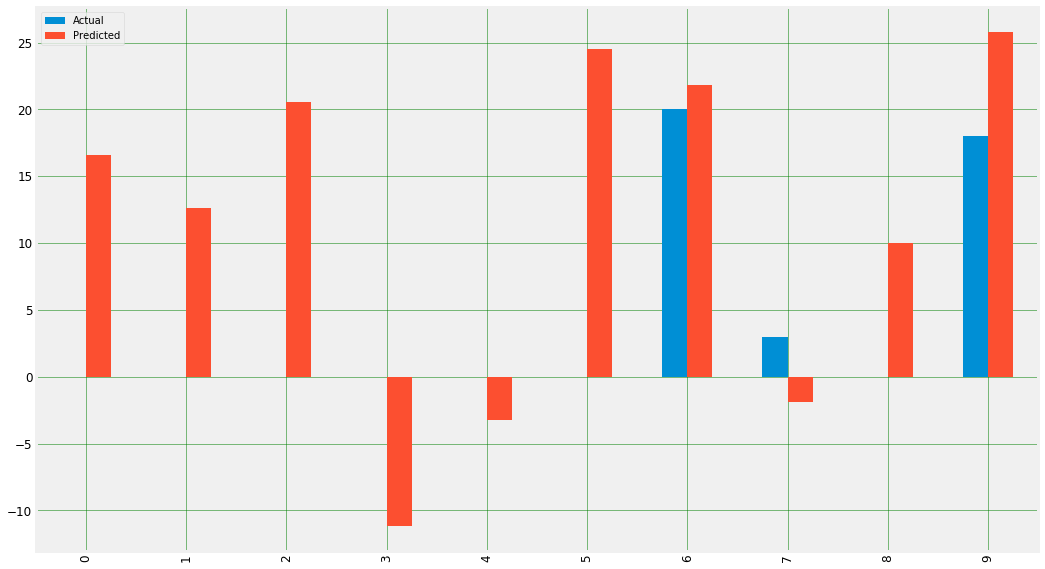

In [94]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

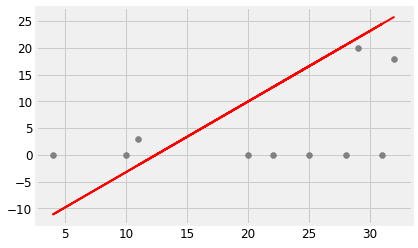

In [95]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 11.314961068922425
Mean Squared Error: 177.83181397909408
Root Mean Squared Error: 13.335359536926408


In [97]:
size = len(confirmed_us)
X_pred = np.asarray([x for x in range(size,size+60)]).reshape(-1,1)

In [98]:
y_pred = regressor.predict(X_pred)

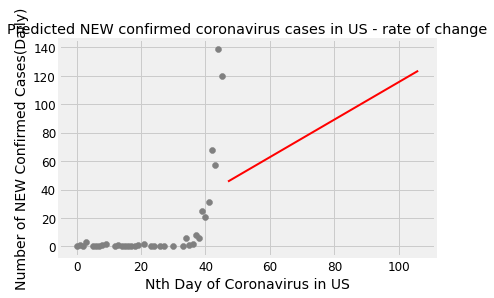

In [99]:
#plot predictions for change of confirmed cases
plt.scatter(X_train, y_train,  color='gray')
plt.plot(X_pred, y_pred, color='red', linewidth=2)
plt.xlabel('Nth Day of Coronavirus in US')
plt.ylabel('Number of NEW Confirmed Cases(Daily)')
plt.title('Predicted NEW confirmed coronavirus cases in US - rate of change')
plt.show()

In [100]:
y_list=[]
cumul_sum=0
for y in list(y_pred.flatten()):
    cumul_sum+=y
    y_list.append(cumul_sum)

In [101]:
total_y = list(y_train.flatten())
total_y.extend(y_list)


In [102]:
total_x = [x for x in range(len(total_y))]

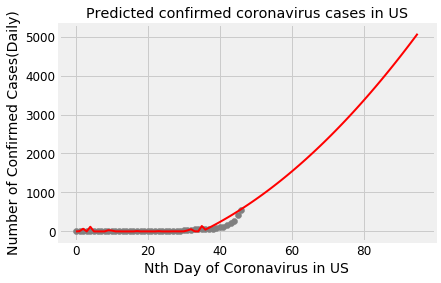

In [103]:
#plot predictions for cumulative confirmed cases
x_orig = [x for x in range(len(confirmed_us))]
plt.scatter(x_orig, confirmed_us,  color='gray')
plt.plot(total_x, total_y, color='red', linewidth=2)
plt.xlabel('Nth Day of Coronavirus in US')
plt.ylabel('Number of Confirmed Cases(Daily)')
plt.title('Predicted confirmed coronavirus cases in US')
plt.show()